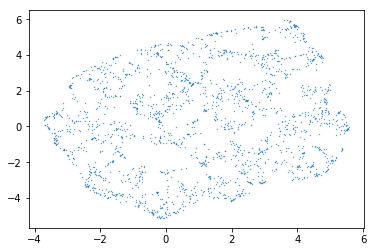

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import umap

# set a seed for consistent randomness
np.random.seed(3801627997)

# generate some points in a high dimensional space
points = np.random.rand(2000, 4)

# project the points to 2D to simulate clustering distribution
points = umap.UMAP().fit_transform(points)

# plot the initial point positions
plt.scatter(points[:,0], points[:,1], s=0.1)

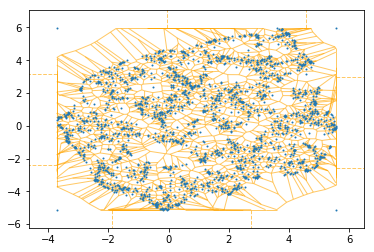

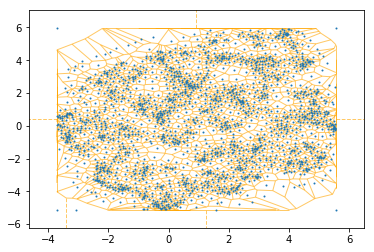

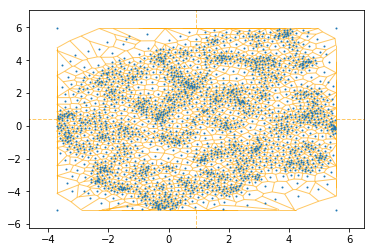

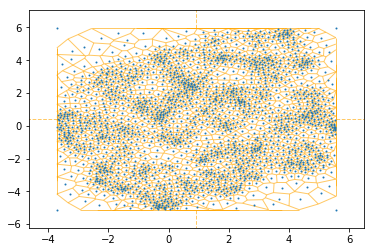

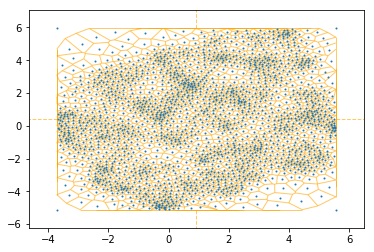

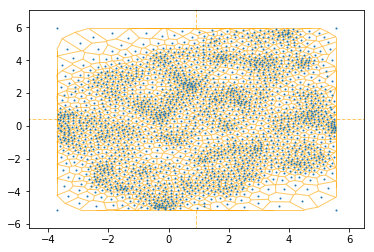

In [2]:
from lloyd import Field
from scipy.spatial import voronoi_plot_2d

# build a model we can use to run lloyd relaxation on the data points
field = Field(points)

# plot the initial voronoi map
voronoi_plot_2d(field.voronoi, show_vertices=False, line_colors='orange', line_alpha=0.6, point_size=2)

# run lloyd relaxation several times and plot the result of each iteration
for i in range(5):
  
  # the .relax() method performs lloyd relaxation, which spaces the points apart
  field.relax()
  
  # plot the updated points and voronoi map
  p = voronoi_plot_2d(field.voronoi, show_vertices=False, line_colors='orange', line_alpha=0.6, point_size=2)

In [3]:
from sklearn.cluster import KMeans
import json

# get the point positions before and after lloyd iteration
points_before = points
points_after = field.get_points()

# write data for D3 plot
with open('plots/positions.json', 'w') as out:
  json.dump({
    'before': [list(i) for i in points_before],
    'after':  [list(i) for i in points_after],
    'groups': [int(i) for i in KMeans(n_clusters=15).fit(points_before).labels_]
  }, out)

In [4]:
points.shape, field.get_points().shape

((2000, 2), (2000, 2))